In [1]:
!pip install lenskit

import lenskit.datasets as ds
import pandas as pd

data = ds.MovieLens('data/')

In [2]:
#!git clone https://github.com/baemin007/Movie-recommendation-system.git
data.ratings.head(10)

,user,item,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [3]:
joined_data = data.ratings.join(data.movies['genres'],on = 'item')
joined_data =joined_data.join(data.movies['title'],on = 'item')
df = joined_data
df.head(10)

,user,item,rating,timestamp,genres,title
0,1,1,4.0,964982703,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,1,3,4.0,964981247,Comedy|Romance,Grumpier Old Men (1995)
2,1,6,4.0,964982224,Action|Crime|Thriller,Heat (1995)
3,1,47,5.0,964983815,Mystery|Thriller,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,964982931,Crime|Mystery|Thriller,"Usual Suspects, The (1995)"
5,1,70,3.0,964982400,Action|Comedy|Horror|Thriller,From Dusk Till Dawn (1996)
6,1,101,5.0,964980868,Adventure|Comedy|Crime|Romance,Bottle Rocket (1996)
7,1,110,4.0,964982176,Action|Drama|War,Braveheart (1995)
8,1,151,5.0,964984041,Action|Drama|Romance|War,Rob Roy (1995)
9,1,157,5.0,964984100,Comedy|War,Canadian Bacon (1995)


In [6]:
minimum_to_include = 20 #<-- You can try changing this minimum to include movies rated by fewer or more people

average_ratings = (data.ratings).groupby(['item']).mean()
rating_counts = (data.ratings).groupby(['item']).count()
average_ratings = average_ratings.loc[rating_counts['rating'] > minimum_to_include]
sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
joined_data = sorted_avg_ratings.join(data.movies['genres'], on='item')
joined_data = joined_data.join(data.movies['title'], on='item')
joined_data = joined_data[joined_data.columns[3:]]

print("RECOMMENDED FOR ANYBODY:")
joined_data.head(10)

RECOMMENDED FOR ANYBODY:


,genres,title
item,,
318,Crime|Drama,"Shawshank Redemption, The (1994)"
922,Drama|Film-Noir|Romance,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
898,Comedy|Drama|Romance,"Philadelphia Story, The (1940)"
475,Drama,In the Name of the Father (1993)
1204,Adventure|Drama|War,Lawrence of Arabia (1962)
246,Documentary,Hoop Dreams (1994)
858,Crime|Drama,"Godfather, The (1972)"
1235,Comedy|Drama|Romance,Harold and Maude (1971)
168252,Action|Sci-Fi,Logan (2017)


In [7]:
average_ratings = (data.ratings).groupby(['item']).mean()
rating_counts = (data.ratings).groupby(['item']).count()
average_ratings = average_ratings.loc[rating_counts['rating'] > minimum_to_include]
average_ratings = average_ratings.join(data.movies['genres'], on='item')
average_ratings = average_ratings.loc[average_ratings['genres'].str.contains('Action')]

sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
joined_data = sorted_avg_ratings.join(data.movies['title'], on='item')
joined_data = joined_data[joined_data.columns[3:]]
print("RECOMMENDED FOR AN ACTION MOVIE FAN:")
joined_data.head(20)

RECOMMENDED FOR AN ACTION MOVIE FAN:


,genres,title
item,,
168252,Action|Sci-Fi,Logan (2017)
2959,Action|Crime|Drama|Thriller,Fight Club (1999)
58559,Action|Crime|Drama|IMAX,"Dark Knight, The (2008)"
1197,Action|Adventure|Comedy|Fantasy|Romance,"Princess Bride, The (1987)"
260,Action|Adventure|Sci-Fi,Star Wars: Episode IV - A New Hope (1977)
3275,Action|Crime|Drama|Thriller,"Boondock Saints, The (2000)"
1208,Action|Drama|War,Apocalypse Now (1979)
1196,Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...
1233,Action|Drama|War,"Boot, Das (Boat, The) (1981)"


In [6]:
import csv

Dennis_rating_dict = {}

with open("Dennis-movie-ratings.csv", newline='') as csvfile:
  ratings_reader = csv.DictReader(csvfile)
  for row in ratings_reader:
    if ((row['ratings'] != "") and (float(row['ratings']) > 0) and (float(row['ratings']) < 6)):
      Dennis_rating_dict.update({int(row['item']): float(row['ratings'])})
      

print("Rating dictionaries assembled!")
print("Sanity check:")
print("\tDennis's rating for 1197 (The Princess Bride) is " + str(Dennis_rating_dict[1197]))


Rating dictionaries assembled!
Sanity check:
	Dennis's rating for 1197 (The Princess Bride) is 4.5


In [7]:
from lenskit.algorithms import Recommender
from lenskit.algorithms.user_knn import UserUser

num_recs = 10  #<---- This is the number of recommendations to generate. You can change this if you want to see more recommendations

user_user = UserUser(15, min_nbrs=3) #These two numbers set the minimum (3) and maximum (15) number of neighbors to consider. These are considered "reasonable defaults," but you can experiment with others too
algo = Recommender.adapt(user_user)
algo.fit(data.ratings)

print("Set up a User-User algorithm!")

Set up a User-User algorithm!


In [8]:
Dennis_recs = algo.recommend(-1, num_recs, ratings=pd.Series(Dennis_rating_dict))  #Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, while 10 is how many recommendations it should generate

joined_data = Dennis_recs.join(data.movies['genres'], on='item')      
joined_data = joined_data.join(data.movies['title'], on='item')
joined_data = joined_data[joined_data.columns[2:]]
print("\n\nRECOMMENDED FOR Dennis:")
joined_data



RECOMMENDED FOR Dennis:


,genres,title
0,Comedy|Drama,"Last Detail, The (1973)"
1,Comedy,Love and Death (1975)
2,Drama,Before Night Falls (2000)
3,Drama,"Magdalene Sisters, The (2002)"
4,Drama|Horror|Mystery|Sci-Fi|Thriller,Black Mirror: White Christmas (2014)
5,Action|Animation|Drama|Fantasy|Sci-Fi,Neon Genesis Evangelion: The End of Evangelion...
6,Action|Adventure|Thriller,Raiders of the Lost Ark: The Adaptation (1989)
7,Comedy|Drama|Romance,Submarine (2010)
8,Adventure|Drama,Nebraska (2013)
9,Documentary,"Endless Summer, The (1966)"


In [9]:
##Futhur STEP 
##making a combined movie recommendation list for entire team

# Content-based recommendation

In [10]:
!pip install rake_nltk

In [4]:
import pandas as pd
from scipy import sparse
from rake_nltk import Rake
import numpy as np
import sklearn.preprocessing as pp
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [5]:
df1 = df
df1.head()

,user,item,rating,timestamp,genres,title
0,1,1,4.0,964982703,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,1,3,4.0,964981247,Comedy|Romance,Grumpier Old Men (1995)
2,1,6,4.0,964982224,Action|Crime|Thriller,Heat (1995)
3,1,47,5.0,964983815,Mystery|Thriller,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,964982931,Crime|Mystery|Thriller,"Usual Suspects, The (1995)"


In [6]:
df1 =df1.join(data.tags['tag'],on = 'item')
df1.head(10)

,user,item,rating,timestamp,genres,title,tag
0,1,1,4.0,964982703,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995),Highly quotable
1,1,3,4.0,964981247,Comedy|Romance,Grumpier Old Men (1995),Boxing story
2,1,6,4.0,964982224,Action|Crime|Thriller,Heat (1995),drugs
3,1,47,5.0,964983815,Mystery|Thriller,Seven (a.k.a. Se7en) (1995),Christopher Lloyd
4,1,50,5.0,964982931,Crime|Mystery|Thriller,"Usual Suspects, The (1995)",gothic
5,1,70,3.0,964982400,Action|Comedy|Horror|Thriller,From Dusk Till Dawn (1996),Pixar
6,1,101,5.0,964980868,Adventure|Comedy|Crime|Romance,Bottle Rocket (1996),adventure
7,1,110,4.0,964982176,Action|Drama|War,Braveheart (1995),scenic
8,1,151,5.0,964984041,Action|Drama|Romance|War,Rob Roy (1995),gothic
9,1,157,5.0,964984100,Comedy|War,Canadian Bacon (1995),clever


In [7]:
df1 = df1[['title','genres','tag']]
df1.head()

,title,genres,tag
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Highly quotable
1,Grumpier Old Men (1995),Comedy|Romance,Boxing story
2,Heat (1995),Action|Crime|Thriller,drugs
3,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,Christopher Lloyd
4,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,gothic


In [8]:
df1.shape

(100836, 3)

In [9]:
# putting the genres in a list of words
df1['genres'] = df1['genres'].map(lambda x: x.lower().split('|'))
df1.head()

,title,genres,tag
0,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",Highly quotable
1,Grumpier Old Men (1995),"[comedy, romance]",Boxing story
2,Heat (1995),"[action, crime, thriller]",drugs
3,Seven (a.k.a. Se7en) (1995),"[mystery, thriller]",Christopher Lloyd
4,"Usual Suspects, The (1995)","[crime, mystery, thriller]",gothic


In [10]:
print(df1.isnull().sum()) 

title         0
genres        0
tag       44536
dtype: int64


In [11]:
df1.dropna(inplace=True)

In [12]:
print(df1.isnull().sum()) 

title     0
genres    0
tag       0
dtype: int64


In [13]:
df1.shape

(56300, 3)

In [14]:
# Ref : https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243

df1['bag_of_words'] = ''
columns = df1.columns
for index, row in df1.iterrows():
    words = ''
    
    for col in columns:
        if col != 'title':
            if isinstance(row[col], list): 
                words = words + ' '.join(row[col])+ ' '
            else:
                words = words + str(row[col])+ ' '
                
    row['bag_of_words'] = words
    
df1.drop(columns = [col for col in df1.columns if col!= 'title' and col!= 'bag_of_words'], inplace = True)

In [15]:
df1.head()

,title,bag_of_words
0,Toy Story (1995),adventure animation children comedy fantasy Hi...
1,Grumpier Old Men (1995),comedy romance Boxing story
2,Heat (1995),action crime thriller drugs
3,Seven (a.k.a. Se7en) (1995),mystery thriller Christopher Lloyd
4,"Usual Suspects, The (1995)",crime mystery thriller gothic


In [67]:
# Ref : https://analyticsindiamag.com/how-to-build-a-content-based-movie-recommendation-system-in-python/
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
matrix = tf.fit_transform(df1['bag_of_words'])
pd.DataFrame(matrix.toarray(), columns=tf.get_feature_names())

,06,06 oscar,06 oscar nominated,1900s,1920s,1950s,1960s,1980s,2001,2001 like,...,younger,younger men,zellweger,zither,zoe,zoe kazan,zombie,zombies,zooey,zooey deschanel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
cosine_sim_tf = cosine_similarity(matrix)
cosine_sim_tf

array([[1.        , 0.00914915, 0.        , ..., 0.01180439, 0.01136593,
        0.        ],
       [0.00914915, 1.        , 0.        , ..., 0.01296934, 0.0124876 ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02661374],
       ...,
       [0.01180439, 0.01296934, 0.        , ..., 1.        , 0.01611173,
        0.        ],
       [0.01136593, 0.0124876 , 0.        , ..., 0.01611173, 1.        ,
        0.05539822],
       [0.        , 0.        , 0.02661374, ..., 0.        , 0.05539822,
        1.        ]])

In [16]:
# Ref : https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243
count = CountVectorizer()
count_matrix = count.fit_transform(df1['bag_of_words'])
pd.DataFrame(count_matrix.toarray(), columns=count.get_feature_names())

,06,1900s,1920s,1950s,1960s,1980s,2001,250,2d,70mm,...,york,you,younger,your,zellweger,zither,zoe,zombie,zombies,zooey
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#sparse_matrix = sparse.csr_matrix(count_matrix)
cosine_sim_count = cosine_similarity(count_matrix)
cosine_sim_count

array([[1.        , 0.18898224, 0.        , ..., 0.21821789, 0.21821789,
        0.        ],
       [0.18898224, 1.        , 0.        , ..., 0.28867513, 0.28867513,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.40824829],
       ...,
       [0.21821789, 0.28867513, 0.        , ..., 1.        , 0.33333333,
        0.        ],
       [0.21821789, 0.28867513, 0.        , ..., 0.33333333, 1.        ,
        0.23570226],
       [0.        , 0.        , 0.40824829, ..., 0.        , 0.23570226,
        1.        ]])

In [18]:
df1.head()

,title,bag_of_words
0,Toy Story (1995),adventure animation children comedy fantasy Hi...
1,Grumpier Old Men (1995),comedy romance Boxing story
2,Heat (1995),action crime thriller drugs
3,Seven (a.k.a. Se7en) (1995),mystery thriller Christopher Lloyd
4,"Usual Suspects, The (1995)",crime mystery thriller gothic


In [19]:
df2 = df1.reset_index(drop=True)

In [20]:
df2

,title,bag_of_words
0,Toy Story (1995),adventure animation children comedy fantasy Hi...
1,Grumpier Old Men (1995),comedy romance Boxing story
2,Heat (1995),action crime thriller drugs
3,Seven (a.k.a. Se7en) (1995),mystery thriller Christopher Lloyd
4,"Usual Suspects, The (1995)",crime mystery thriller gothic
...,...,...
56295,Mission: Impossible II (2000),action adventure thriller violence
56296,Shanghai Noon (2000),action adventure comedy western action
56297,Big Momma's House (2000),comedy mental illness
56298,Blazing Saddles (1974),comedy western violent


In [21]:
print(df2)

                                                   title  \
0                                       Toy Story (1995)   
1                                Grumpier Old Men (1995)   
2                                            Heat (1995)   
3                            Seven (a.k.a. Se7en) (1995)   
4                             Usual Suspects, The (1995)   
...                                                  ...   
56295                      Mission: Impossible II (2000)   
56296                               Shanghai Noon (2000)   
56297                           Big Momma's House (2000)   
56298                             Blazing Saddles (1974)   
56299  For a Few Dollars More (Per qualche dollaro in...   

                                            bag_of_words  
0      adventure animation children comedy fantasy Hi...  
1                          comedy romance Boxing story    
2                          action crime thriller drugs    
3                   mystery thriller Christ

In [22]:
movie_title = df2['title']
movie_title

0                                         Toy Story (1995)
1                                  Grumpier Old Men (1995)
2                                              Heat (1995)
3                              Seven (a.k.a. Se7en) (1995)
4                               Usual Suspects, The (1995)
                               ...                        
56295                        Mission: Impossible II (2000)
56296                                 Shanghai Noon (2000)
56297                             Big Momma's House (2000)
56298                               Blazing Saddles (1974)
56299    For a Few Dollars More (Per qualche dollaro in...
Name: title, Length: 56300, dtype: object

In [23]:
indices = pd.Series(df2.index, index=df2['title'])
indices

title
Toy Story (1995)                                                  0
Grumpier Old Men (1995)                                           1
Heat (1995)                                                       2
Seven (a.k.a. Se7en) (1995)                                       3
Usual Suspects, The (1995)                                        4
                                                              ...  
Mission: Impossible II (2000)                                 56295
Shanghai Noon (2000)                                          56296
Big Momma's House (2000)                                      56297
Blazing Saddles (1974)                                        56298
For a Few Dollars More (Per qualche dollaro in più) (1965)    56299
Length: 56300, dtype: int64

# Recommend movies by using CountVectorizer() and cosine_similarity()

In [24]:
def movie_recommend(original_title):

    idx = indices[original_title]
    
#     print('idx', idx)

    sim_scores = list(enumerate(cosine_sim_count[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[0], reverse=True)

    sim_scores = sim_scores[1:31]

    movie_indices = [i[0] for i in sim_scores]

    return movie_title.iloc[movie_indices]

In [25]:
movie_recommend('Mission: Impossible II (2000)').head(10)

75                                         Alien (1979)
74                                    Goodfellas (1990)
73    Star Wars: Episode VI - Return of the Jedi (1983)
72                                Apocalypse Now (1979)
71                           Clockwork Orange, A (1971)
70    Raiders of the Lost Ark (Indiana Jones and the...
69                           Princess Bride, The (1987)
68    Star Wars: Episode V - The Empire Strikes Back...
67               Monty Python and the Holy Grail (1975)
66                                    Abyss, The (1989)
Name: title, dtype: object

In [26]:
movie_recommend('Toy Story (1995)').head(10)

213                                      Red Dawn (1984)
212              Teenage Mutant Ninja Turtles III (1993)
211    Teenage Mutant Ninja Turtles II: The Secret of...
210                                           JFK (1991)
209                                      Scream 3 (2000)
208                                 Wayne's World (1992)
207                                    Sister Act (1992)
206                                    Encino Man (1992)
205                      Talented Mr. Ripley, The (1999)
204                                    Easy Rider (1969)
Name: title, dtype: object

In [72]:
if 'Smokey and the Bandit II (1980)' in movie_title.values:
    print('Element does exist in Dataframe')

In [ ]:
movies1 = movie_recommend('Smokey and the Bandit II (1980)').head(5)
movies2 = movie_recommend('Emerald Green (2016)').head(4)
movies3 = movie_recommend('Sapphire Blue (2014)').head(3)
movies4 = movie_recommend('Ruby Red (2013)').head(2)
movies5 = movie_recommend('Shake Hands with the Devil (2007)').head(1)

In [28]:
movie_recommend('Sister Act (1992)').head(10)

34       Silence of the Lambs, The (1991)
33                          Batman (1989)
32              Dances with Wolves (1990)
31                       Tombstone (1993)
30           Three Musketeers, The (1993)
29    So I Married an Axe Murderer (1993)
28                Schindler's List (1993)
27                  Mrs. Doubtfire (1993)
26                   Jurassic Park (1993)
25                   Fugitive, The (1993)
Name: title, dtype: object

In [29]:
movie_recommend('Apocalypse Now (1979)').head(10)

105                                     Game, The (1997)
104                                Kiss the Girls (1997)
103                             L.A. Confidential (1997)
102                           Conan the Barbarian (1982)
101                     Men in Black (a.k.a. MIB) (1997)
100                                      Face/Off (1997)
99                                        Con Air (1997)
98     Austin Powers: International Man of Mystery (1...
97                            Grosse Pointe Blank (1997)
96                                       Best Men (1997)
Name: title, dtype: object

In [30]:
movie_recommend('Star Wars: Episode VI - Return of the Jedi (1983)').head(10)

194    Who Framed Roger Rabbit? (1988)
193                     RoboCop (1987)
192                  Fight Club (1999)
191                      Dr. No (1962)
190       From Russia with Love (1963)
189                  Goldfinger (1964)
188            Dirty Dozen, The (1967)
187                Total Recall (1990)
186          Gulliver's Travels (1939)
185                   Excalibur (1981)
Name: title, dtype: object

In [64]:
movie_recommend('JFK (1991)').head(10)

29    So I Married an Axe Murderer (1993)
28                Schindler's List (1993)
27                  Mrs. Doubtfire (1993)
26                   Jurassic Park (1993)
25                   Fugitive, The (1993)
24              Dazed and Confused (1993)
23                      Blown Away (1994)
22                       Mask, The (1994)
21                Jungle Book, The (1994)
20                    Forrest Gump (1994)
Name: title, dtype: object

In [143]:
movie_recommend('Titanic (1997)').head(10) # <class 'pandas.core.series.Series'>

138                       American Tail, An (1986)
137                     Secret of NIMH, The (1982)
136                         Charlotte's Web (1973)
135                  Lord of the Rings, The (1978)
134    Indiana Jones and the Temple of Doom (1984)
133                                    Tron (1982)
132                       Song of the South (1946)
131                         Sleeping Beauty (1959)
130                          Rocketeer, The (1991)
129                            Return to Oz (1985)
Name: title, dtype: object

# Recommend movies by using TfidfVectorizer() and cosine_similarity()

In [24]:
def movie_recommend_tf(original_title):

    idx = indices[original_title]
    
#     print('idx', idx)

    sim_scores = list(enumerate(cosine_sim_tf[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[0], reverse=True)

    sim_scores = sim_scores[1:31]

    movie_indices = [i[0] for i in sim_scores]

    return movie_title.iloc[movie_indices]

In [25]:
movie_recommend_tf('Mission: Impossible II (2000)').head(10)

75                                         Alien (1979)
74                                    Goodfellas (1990)
73    Star Wars: Episode VI - Return of the Jedi (1983)
72                                Apocalypse Now (1979)
71                           Clockwork Orange, A (1971)
70    Raiders of the Lost Ark (Indiana Jones and the...
69                           Princess Bride, The (1987)
68    Star Wars: Episode V - The Empire Strikes Back...
67               Monty Python and the Holy Grail (1975)
66                                    Abyss, The (1989)
Name: title, dtype: object

In [26]:
movie_recommend_tf('Titanic (1997)').head(10)

138                       American Tail, An (1986)
137                     Secret of NIMH, The (1982)
136                         Charlotte's Web (1973)
135                  Lord of the Rings, The (1978)
134    Indiana Jones and the Temple of Doom (1984)
133                                    Tron (1982)
132                       Song of the South (1946)
131                         Sleeping Beauty (1959)
130                          Rocketeer, The (1991)
129                            Return to Oz (1985)
Name: title, dtype: object

In [27]:
movie_recommend_tf('JFK (1991)').head(10)

29    So I Married an Axe Murderer (1993)
28                Schindler's List (1993)
27                  Mrs. Doubtfire (1993)
26                   Jurassic Park (1993)
25                   Fugitive, The (1993)
24              Dazed and Confused (1993)
23                      Blown Away (1994)
22                       Mask, The (1994)
21                Jungle Book, The (1994)
20                    Forrest Gump (1994)
Name: title, dtype: object

In [28]:
movie_recommend_tf('Toy Story (1995)').head(10)

213                                      Red Dawn (1984)
212              Teenage Mutant Ninja Turtles III (1993)
211    Teenage Mutant Ninja Turtles II: The Secret of...
210                                           JFK (1991)
209                                      Scream 3 (2000)
208                                 Wayne's World (1992)
207                                    Sister Act (1992)
206                                    Encino Man (1992)
205                      Talented Mr. Ripley, The (1999)
204                                    Easy Rider (1969)
Name: title, dtype: object

In [29]:
movie_recommend_tf('Sister Act (1992)').head(10)

34       Silence of the Lambs, The (1991)
33                          Batman (1989)
32              Dances with Wolves (1990)
31                       Tombstone (1993)
30           Three Musketeers, The (1993)
29    So I Married an Axe Murderer (1993)
28                Schindler's List (1993)
27                  Mrs. Doubtfire (1993)
26                   Jurassic Park (1993)
25                   Fugitive, The (1993)
Name: title, dtype: object

In [30]:
movie_recommend_tf('Apocalypse Now (1979)').head(10)

105                                     Game, The (1997)
104                                Kiss the Girls (1997)
103                             L.A. Confidential (1997)
102                           Conan the Barbarian (1982)
101                     Men in Black (a.k.a. MIB) (1997)
100                                      Face/Off (1997)
99                                        Con Air (1997)
98     Austin Powers: International Man of Mystery (1...
97                            Grosse Pointe Blank (1997)
96                                       Best Men (1997)
Name: title, dtype: object

# Recommend movies based on a user's watch history

We couldn't find an existing movie recommender that is based on a user's watch history in our research.  So, we decided to come up with our own concept for implementing a movie recommender that accounts for the user's watch history.  Upon sharing this concept with our lead TA Qifan, he said that this was a good idea for our project.  The following diagram depicts our idea behind a movie recommender that uses the user's watch history.    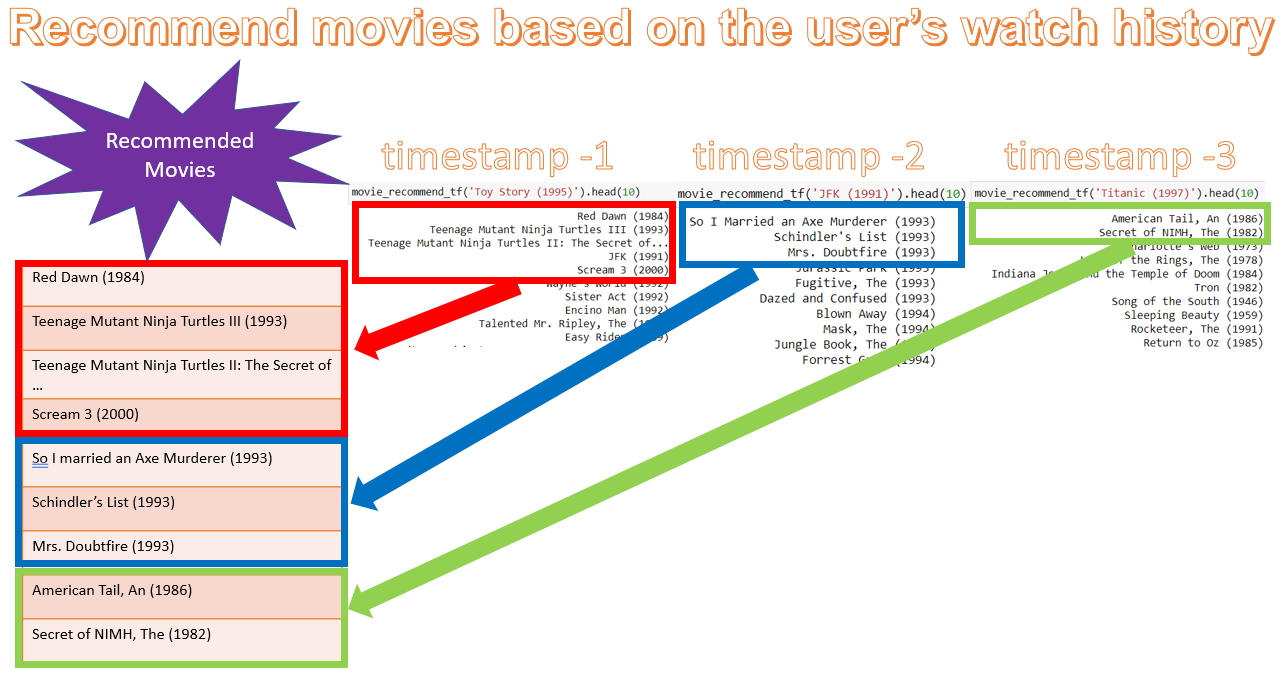

For the most recent N timestamps, we use the content-based recommender in recommending movies for the particular movie that s/he watched at each timestamps.  In the same way, we compute recommended movies for the movies that the user watched at different timestampes.  The most recent timestamp (in red) carries the highest weight to the nummber of recommended movies that end up in the final list of recommended movies, whereas the least recent timestamp (in green) carries the lowest weight to the nummber of recommended movies that end up in the final list of recommended movies.

In [27]:
# Let's see the occurence of each user in the dataframe 'df'
# Select the 'user' column
userID_col = df["user"]

print("Occurance of users:")
# Count the occurance of each user
print(userID_col.value_counts())

Occurance of users:
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: user, Length: 610, dtype: int64


In [28]:
df.head(10)

,user,item,rating,timestamp,genres,title
0,1,1,4.0,964982703,Adventure|Animation|Children|Comedy|Fantasy,Toy Story (1995)
1,1,3,4.0,964981247,Comedy|Romance,Grumpier Old Men (1995)
2,1,6,4.0,964982224,Action|Crime|Thriller,Heat (1995)
3,1,47,5.0,964983815,Mystery|Thriller,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,964982931,Crime|Mystery|Thriller,"Usual Suspects, The (1995)"
5,1,70,3.0,964982400,Action|Comedy|Horror|Thriller,From Dusk Till Dawn (1996)
6,1,101,5.0,964980868,Adventure|Comedy|Crime|Romance,Bottle Rocket (1996)
7,1,110,4.0,964982176,Action|Drama|War,Braveheart (1995)
8,1,151,5.0,964984041,Action|Drama|Romance|War,Rob Roy (1995)
9,1,157,5.0,964984100,Comedy|War,Canadian Bacon (1995)


In [29]:
# Before we can recommend movies, we need to know who the user is first!
# 
# By looking at "ratings.csv," we're going to pick a user.
# For this user, we need to ensure that the movies s/he watched are included in the dataframe "df2" above.
# Let's pick a user whose userID is 107.

select_user = df.loc[df['user'] == 107]
# print(select_user)

In [30]:
# Let's create a dictionary with the movieIDs and their corresponding timestamps for the "user"
movieID_timestamp = dict(zip(select_user['item'], select_user['timestamp']))
# movieID_timestamp

In [31]:
# We need to sort the movieID_timestamp dictionary in a descending order.
sorted_movieID_timestamp = dict(sorted(movieID_timestamp.items(), key=lambda item: item[1], reverse=True))
# sorted_movieID_timestamp

In [32]:
# Next, we'll take the first N most recent timestamps!  For simplicity, set N = 5.
# Get the first N items in the dictionary
N = 5
first_N_sorted_movieID_timestamp = dict(list(sorted_movieID_timestamp.items())[0: N])
first_N_sorted_movieID_timestamp

{111: 832003891,
 160: 832003891,
 317: 832003891,
 432: 832003891,
 266: 832003845}

In [33]:
# Let's create a dictionary with the movieIDs and their corresponding titles.
movieID_title = dict(zip(df.item, df.title))
movieID_title

{1: 'Toy Story (1995)',
 3: 'Grumpier Old Men (1995)',
 6: 'Heat (1995)',
 47: 'Seven (a.k.a. Se7en) (1995)',
 50: 'Usual Suspects, The (1995)',
 70: 'From Dusk Till Dawn (1996)',
 101: 'Bottle Rocket (1996)',
 110: 'Braveheart (1995)',
 151: 'Rob Roy (1995)',
 157: 'Canadian Bacon (1995)',
 163: 'Desperado (1995)',
 216: 'Billy Madison (1995)',
 223: 'Clerks (1994)',
 231: 'Dumb & Dumber (Dumb and Dumber) (1994)',
 235: 'Ed Wood (1994)',
 260: 'Star Wars: Episode IV - A New Hope (1977)',
 296: 'Pulp Fiction (1994)',
 316: 'Stargate (1994)',
 333: 'Tommy Boy (1995)',
 349: 'Clear and Present Danger (1994)',
 356: 'Forrest Gump (1994)',
 362: 'Jungle Book, The (1994)',
 367: 'Mask, The (1994)',
 423: 'Blown Away (1994)',
 441: 'Dazed and Confused (1993)',
 457: 'Fugitive, The (1993)',
 480: 'Jurassic Park (1993)',
 500: 'Mrs. Doubtfire (1993)',
 527: "Schindler's List (1993)",
 543: 'So I Married an Axe Murderer (1993)',
 552: 'Three Musketeers, The (1993)',
 553: 'Tombstone (1993)',
 5

In [34]:
# Given first_N_sorted_movieID_timestamp, we'll figure out the corresponding movie titles 
# by using the movieID_title dictionary.

first_N_sorted_titles = []

for movieID in first_N_sorted_movieID_timestamp.keys():
#     print(movieID)
    first_N_sorted_titles.append(movieID_title.get(movieID))
first_N_sorted_titles

['Taxi Driver (1976)',
 'Congo (1995)',
 'Santa Clause, The (1994)',
 "City Slickers II: The Legend of Curly's Gold (1994)",
 'Legends of the Fall (1994)']

In [35]:
# For each move title, we'll user the content-based recommender in recommending movies.
# To make our recommended movies adaptive to the user's watching history, we'll decrement 
# the number of recommended movies by 1 for each watched movie (aka timestamp).
# In our example, we're decrementing from 5 to 1.

movies1 = movie_recommend(first_N_sorted_titles[0]).head(5)
movies2 = movie_recommend(first_N_sorted_titles[1]).head(4)
movies3 = movie_recommend(first_N_sorted_titles[2]).head(3)
movies4 = movie_recommend(first_N_sorted_titles[3]).head(2)
movies5 = movie_recommend(first_N_sorted_titles[4]).head(1)

In [36]:
# Now, we list recommended movies by concatenating the movies together.

recommended_movies = pd.concat([movies1, movies2, movies3, movies4, movies5])
recommended_movies

102                           Conan the Barbarian (1982)
101                     Men in Black (a.k.a. MIB) (1997)
100                                      Face/Off (1997)
99                                        Con Air (1997)
98     Austin Powers: International Man of Mystery (1...
55                       Bedknobs and Broomsticks (1971)
54                                  Pete's Dragon (1977)
53                                          Dumbo (1941)
52                        Sword in the Stone, The (1963)
79                                        Henry V (1989)
78                              Full Metal Jacket (1987)
77                            Blues Brothers, The (1980)
53                                          Dumbo (1941)
52                        Sword in the Stone, The (1963)
66                                     Abyss, The (1989)
Name: title, dtype: object

In [37]:
# Let's convert the panda series to a list.

list_of_recommended_movies = recommended_movies.tolist()
list_of_recommended_movies

['Conan the Barbarian (1982)',
 'Men in Black (a.k.a. MIB) (1997)',
 'Face/Off (1997)',
 'Con Air (1997)',
 'Austin Powers: International Man of Mystery (1997)',
 'Bedknobs and Broomsticks (1971)',
 "Pete's Dragon (1977)",
 'Dumbo (1941)',
 'Sword in the Stone, The (1963)',
 'Henry V (1989)',
 'Full Metal Jacket (1987)',
 'Blues Brothers, The (1980)',
 'Dumbo (1941)',
 'Sword in the Stone, The (1963)',
 'Abyss, The (1989)']

In [38]:
# Before presenting the list of recommended movies to the user, we need to ensure that the movies s/he previously watched
# are removed from the final list.

for sorted_title in first_N_sorted_titles:
    if sorted_title in list_of_recommended_movies:
        list_of_recommended_movies.remove(sorted_title)
        print("Deleted an already watch movie from the list of recommended movies!")
        
list_of_recommended_movies        

['Conan the Barbarian (1982)',
 'Men in Black (a.k.a. MIB) (1997)',
 'Face/Off (1997)',
 'Con Air (1997)',
 'Austin Powers: International Man of Mystery (1997)',
 'Bedknobs and Broomsticks (1971)',
 "Pete's Dragon (1977)",
 'Dumbo (1941)',
 'Sword in the Stone, The (1963)',
 'Henry V (1989)',
 'Full Metal Jacket (1987)',
 'Blues Brothers, The (1980)',
 'Dumbo (1941)',
 'Sword in the Stone, The (1963)',
 'Abyss, The (1989)']

In [39]:
def recommend_movies_based_on_user_watch_history(userID):
    # Before we can recommend movies, we need to know who the user is first!
    # 
    # By looking at "ratings.csv," we're going to pick a user.
    # For this user, we need to ensure that the movies s/he watched are included in the dataframe "df2" above.
    # For example, we're using userID 107.
    select_user = df.loc[df['user'] == userID]
    
    # Let's create a dictionary with the movieIDs and their corresponding timestamps for the "user"
    movieID_timestamp = dict(zip(select_user['item'], select_user['timestamp']))
    
    # We need to sort the movieID_timestamp dictionary in a descending order.
    sorted_movieID_timestamp = dict(sorted(movieID_timestamp.items(), key=lambda item: item[1], reverse=True))
    
    # Next, we'll take the first N most recent timestamps!  For simplicity, set N = 5.
    # Get the first N items in the dictionary
    N = 5
    first_N_sorted_movieID_timestamp = dict(list(sorted_movieID_timestamp.items())[0: N])
    
    # Let's create a dictionary with the movieIDs and their corresponding titles.
    movieID_title = dict(zip(df.item, df.title))
    
    # Given first_N_sorted_movieID_timestamp, we'll figure out the corresponding movie titles 
    # by using the movieID_title dictionary.

    first_N_sorted_titles = []

    for movieID in first_N_sorted_movieID_timestamp.keys():
    #     print(movieID)
        first_N_sorted_titles.append(movieID_title.get(movieID))
    
    # For each move title, we'll user the content-based recommender in recommending movies.
    # To make our recommended movies adaptive to the user's watching history, we'll decrement 
    # the number of recommended movies by 1 for each watched movie (aka timestamp).
    # In our example, we're decrementing from 5 to 1.

    movies1 = movie_recommend(first_N_sorted_titles[0]).head(5)
    movies2 = movie_recommend(first_N_sorted_titles[1]).head(4)
    movies3 = movie_recommend(first_N_sorted_titles[2]).head(3)
    movies4 = movie_recommend(first_N_sorted_titles[3]).head(2)
    movies5 = movie_recommend(first_N_sorted_titles[4]).head(1)
    
    # Now, we list recommended movies by concatenating the movies together.
    recommended_movies = pd.concat([movies1, movies2, movies3, movies4, movies5])
    
    # Let's convert the panda series to a list.
    list_of_recommended_movies = recommended_movies.tolist()
    
    # We need to ensure that the movies s/he previously watched
    # are removed from the final list.

    for sorted_title in first_N_sorted_titles:
        if sorted_title in list_of_recommended_movies:
            list_of_recommended_movies.remove(sorted_title)
            print("Deleted an already watch movie from the list of recommended movies!")
            
    # Before returning the final list of movies, we need to remove any dupliates in the list.
    final_list = []
 
    for movie in list_of_recommended_movies:
        if movie not in final_list:
            final_list.append(movie)
    

    return(final_list)   
    

In [40]:
# Enter a userID to generate a list of recommended movies 
# based on the user's watch history

recommend_movies_based_on_user_watch_history(107)

['Conan the Barbarian (1982)',
 'Men in Black (a.k.a. MIB) (1997)',
 'Face/Off (1997)',
 'Con Air (1997)',
 'Austin Powers: International Man of Mystery (1997)',
 'Bedknobs and Broomsticks (1971)',
 "Pete's Dragon (1977)",
 'Dumbo (1941)',
 'Sword in the Stone, The (1963)',
 'Henry V (1989)',
 'Full Metal Jacket (1987)',
 'Blues Brothers, The (1980)',
 'Abyss, The (1989)']